In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import env
import wrangle
import split_scale

In [2]:
df = sns.load_dataset('tips')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#Making x and y each one column. They're in a univariate relationship. They're paired together 
#to see if tip, as the independent variable, can accurately predict the dependent variable, the total bill.
#If people have a high variance in their tipping rate, then they're likely independent.
#If total is dependent on the tip, than everybody is tipping at the same rate.
y = df.total_bill
x = df.tip


In [5]:
#Call up the model from statsmodels.formula.api, throw in the mandatory fit() into the assignment
#to variable.
regr = ols('y ~ x', data=df).fit()

In [6]:
#New column that is the predicted y scores given the x and y data it was fit to.
df["yhat"] = regr.predict(pd.DataFrame(x))

In [7]:
#Subtracting our predicted-y value from the actual-y value will give us a residual broadcasted
#to every row.
df['residual'] = df['yhat'] - df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual
0,16.99,1.01,Female,No,Sun,Dinner,2,11.141475,-5.848525
1,10.34,1.66,Male,No,Sun,Dinner,3,13.967489,3.627489
2,21.01,3.50,Male,No,Sun,Dinner,3,21.967283,0.957283
3,23.68,3.31,Male,No,Sun,Dinner,2,21.141218,-2.538782
4,24.59,3.61,Female,No,Sun,Dinner,4,22.445532,-2.144468


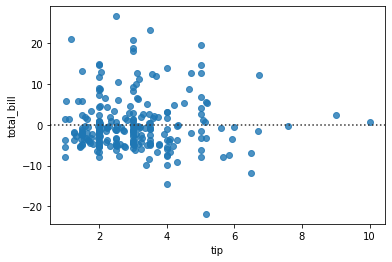

In [8]:
#Instead of eyeballing the scores on every row, lets plot them on a line, centered on 0, 
#which is where the predicted values were pretty close to the actual value.
sns.residplot(x=x, y=y, data=df)

In [9]:
df['residual^2'] = df.residual ** 2
type(df['residual^2'])

pandas.core.series.Series

In [10]:

SSE = sum(df['residual^2'])

In [11]:
MSE = SSE/len(df)

In [12]:
MSE

42.88823752111092

In [13]:
MSE_function = mean_squared_error(df.total_bill, df.yhat)

In [14]:
MSE_function

42.88823752111093

In [15]:
RMSE = sqrt(MSE)

In [16]:
RMSE

6.548911170653556

In [17]:
ESS = sum((df.yhat - df.tip.mean())**2)


In [18]:
ESS

77559.19525960315

In [19]:
TSS = ESS + SSE

In [20]:
TSS

88023.92521475421

In [21]:
yhat = df.total_bill.mean()

AttributeError: 'float' object has no attribute 'mean'

In [67]:
df['residual'] = yhat - df['total_bill']

In [73]:
def baseline_mean_errors(y):
    yhat = y.mean() 
    df['residual'] = yhat - y
    df['residual^2'] = df.residual ** 2
    SSE = sum(df['residual^2'])
    MSE = SSE/len(df)
    RMSE = sqrt(MSE)
    ESS = sum((df.yhat - df.tip.mean())**2)
    TSS = ESS + SSE
    return SSE, ESS, TSS, MSE, RMSE

In [74]:
baseline_mean_errors(x)

(19258.464083196715,
 77559.19525960315,
 96817.65934279986,
 78.92813148851113,
 8.88415057777113)

In [24]:
def make_ols_model():
    y = df.total_bill
    x = df.tip
    regr = ols('y ~ x', data=df).fit()
    #use that fitted ols model's predict method on the x column 
    df["yhat"] = regr.predict(pd.DataFrame(x))

In [25]:
make_ols_model()

In [26]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'yhat',
       'residual', 'residual^2'],
      dtype='object')

In [ ]:
df.yhat